# Interpolation

The first algorithm students are introduced to is Linear Regression. It assumed a linear relationship between the dependent (Y) and independent variables (X). However this is rarely the case in reality. To improve linear models often higher order models like Polynomial Regression generates better results. Using Polynomial Regression on datasets with high variability however might result in over-fitting. A method to overcome the change of over-fitting is a non-linear approach known as Regression Splines. In this tutorial we will practice interpolation by means of numpy and scipy libraries and by means of an own implementation.

### Linear Interpolation

Linear Interpolation is a method of curve fitting using linear polynomials to construct new data points within the range of a discrete set of known data points. Let us look to a very simple example

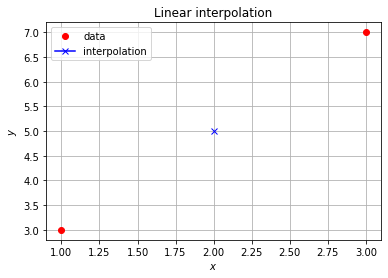

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
#original data points xdata = {x0,x1}, ydata = {y0, y1} f = function that describes the relation
xdata = np.array([1, 3])
f = 1 + 2*xdata
ydata = np.array(f) # linear function y = 1 + 2x (remember I can put in values but also expressions resulting values)


xs = [2]# to be interpolated data point
ys = np.interp(xs, xdata, ydata) #based on previous xdata, ydata relation estimate ys for xs


plt.title('Linear interpolation');
plt.plot(xdata, ydata, 'or', label='data') #plot the original values with a red circle
plt.plot(xs, ys, '-xb', label='interpolation') #plot the interpolated values with a blue cross 
plt.grid(True);
plt.xlabel('$x$'); plt.ylabel('$y$'); plt.legend(); 
plt.show()


We can apply the same principle for other polynomial relations, for instance a sinus function

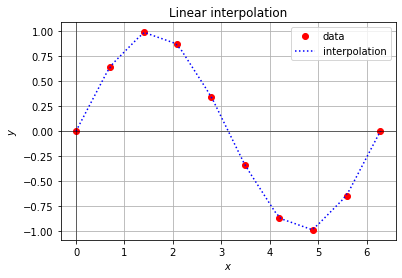

In [2]:
#original data points using linspace to generate 10 datapoints sequence
xdata = np.linspace(0, 2*np.pi, 10)
ydata = np.sin(xdata) # use sinus function to calculate the sinus ydata for xdata

# to be interpolated data point
xs = np.linspace(0, 2*np.pi, 50) #create 50 datapoints sequence
ys = np.interp(xs, xdata, ydata) #based on previous xdata, ydata relation estimate ys for xs

plt.title('Linear interpolation');
plt.plot(xdata, ydata, 'or', label='data') # use round red 'or' for original data
plt.plot(xs, ys, ':b', label='interpolation') # use ....for interpolated data
plt.grid(True); plt.axhline(y=0.0, color='k', lw=0.5); plt.axvline(x=0.0, color='k', lw=0.5)
plt.xlabel('$x$'); plt.ylabel('$y$'); plt.legend(); 
plt.show()


As you can see the interpolation line is not very smooth. It uses a simple linear model to interpolate. The scipy module has more interpolation options. Next to the linear option `interpolate.interp1d(xdata, ydata, kind='linear')` in included the `interpolate.interp1d(xdata, ydata, kind='nearest')` option and the `interpolate.lagrange(xdata, ydata)` option and a few more. 

In [3]:
# algorithm
from scipy import interpolate
#f = interpolate.<method>(xdata, ydata, <options>)
#xs = [] #some sequence of x values
#ys = f(xs)

### Exercise 1

Find the proper implementation of interpolate method to generate the following figure. First use the script above and replace the `ys = np.interp(xs, xdata, ydata)` line with the implementation of the linear scipy interpolation method. Then try some other interpolation methods. You can use scipy methods for this exercise or your own methods in case you have written a method in the data science class earlier.

<img src="../images/smooth.png" alt="smooth interpolation" width="500" height="500" align = "left">

### Exercise 2: Implementing Newton's interpolation model


<img src="../images/newton.jpg" alt="newton" width="500" height="500" align = "center">

Supose we have a vector $x [0,1,2,3]$ and a vector $y [1,4,9,16]$
We can use the newton's interpolated polynomial algorithm to define the polynomial. 
The algorithm is as follow

    1. determine the length n of the vectors
    
    2. create a zero matrix of length (n,n)
    [[ 0.  0.  0.  0.]
     [ 0.  0.  0.  0.]
     [ 0.  0.  0.  0.]
     [ 0.  0.  0.  0.]]  
     
    3. copy the y vector as the first column 
    [[ 1.  0.  0.  0.]
     [ 4.  0.  0.  0.]
     [ 9.  0.  0.  0.]
     [16.  0.  0.  0.]]
     
    4. for the next columns use the formula 
       for row in range(column,n):
            M[row,column] = (M[row,column-1]-M[row-1,column-1])/(x[row]-x[row-column])
            
    returning this        
    [[ 1.  0.  0.  0.]
     [ 4.  3.  0.  0.]
     [ 9.  5.  1.  0.]
     [16.  7.  1.  0.]]
     
    5. Fetch the diagonal to get the coeficients
    [1. 3. 1. 0.]
    
    6. Use the coeficients in the formula
    
        """f(x) = b0 + b1*(x - x[0]) + b2*(x-x[0])(x-x[1]) + b3*(x-x[0])(x-x[1])(x-x[2])"""
        
        for i in range(0, n):
            y[i] = b0 +                                                 \
                  (b1*(xs[i]-xdata[0])) +                               \
                  (b2*(xs[i]-xdata[0])*(xs[i]-xdata[1])) +              \
                  (b3*(xs[i]-xdata[0])*(xs[i]-xdata[1])*(xs[i]-xdata[2]))
                  
              
    to find the estimated y's
   

In [ ]:
#determine length of vector x, this should be 4 in the case of x = [0,1,2,3] 
#put your code here

In [ ]:
#create a zero matrix of (n,n). Use numpy to do this
#put your code here

In [ ]:
#copy the y vector as the first column use 
#put your code here

In [ ]:
#Fetch the diagonal to get the coeficients
#put your code here

In [ ]:
#use the coeficients to estimate y
#put your code here

### Exercise 3: plot your newton method

In [ ]:
xdata = np.array([0,1,2,3]) 
ydata = np.array([1,4,9,16])

# to be interpolated data point
xs = np.linspace(0, 10, 100) 
ys = # put your code here

plt.title('Linear interpolation');
plt.plot(xdata, ydata, 'or', label='data') # use round red 'or' for original data
plt.plot(xs, ys, ':b', label='interpolation') # use ....for interpolated data
plt.grid(True); 
plt.xlabel('$x$'); plt.ylabel('$y$'); plt.legend(); 
plt.show()

The plot should look like this 
<br></br>
<img src="../images/poly.png" alt="polynoom" width="500" height="500" align = "left">

### np.polyfit function

The `np.polyfit` method is a built in method that fits the data to a specific order function. It returns the Polynomial coefficients, highest power first. 

In [ ]:
weights = np.polyfit(xdata, ydata, 2) # returns x^2 + 2x + 1
print(weights)

### Exercise 4: plot with polyfit function
Plot data and fitted line with 2nd order and third order function

### Exercise 5: Make it robuust code

The code you wrote above is just pieces of code junk. Can you think of a script that does not have repeated parts and maybe even a generic method for interpolation 

More to read:

https://mmas.github.io/interpolation-scipy <br></br>
https://www.analyticsvidhya.com/blog/2018/03/introduction-regression-splines-python-codes/